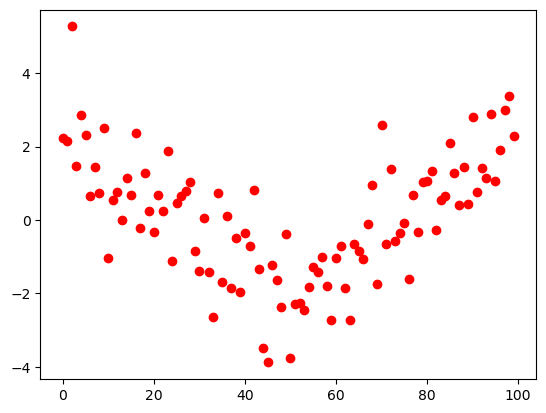

In [98]:
#1) Generate and plot the noisy signal using scatter plot ?

import numpy as np
from math import pi
from numpy.random import random
from matplotlib import pyplot as plt
from scipy.linalg import svd

N = 100

x = np.linspace(0, 99, N)
noise = np.random.normal(size=N)
y = 2 * np.cos(2 * np.pi * x / 100) + noise


plt.scatter(x, y,color='red')
plt.show()

w_best = [ 2.89711377e+00 -1.72328591e-01  1.70724181e-03  4.00667861e-07]


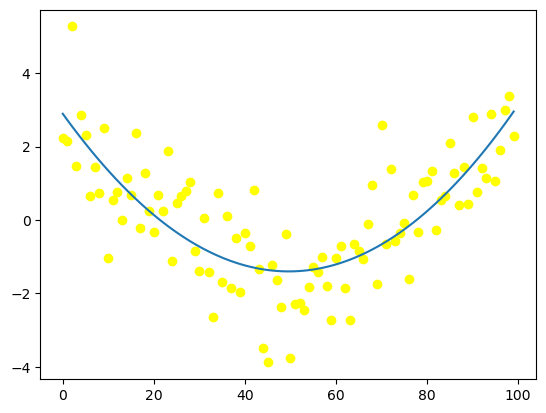

In [104]:
#2) Fit a 3rd degree polynomial curve to 𝑥 using least squares.




def basis_expansion(x, degree):
    return np.power(x, np.arange(degree+1))




degree = 3


X = np.zeros((N, degree+1))
for i in range(N):
    X[i] = basis_expansion(x[i], degree)
    

U, d, VT = svd(X,full_matrices=False)


D = np.diag(1/d)

w_best = VT.T.dot(D).dot(U.T).dot(y)
print('w_best =', w_best)

y_predicted1 = X.dot(w_best)


plt.scatter(x, y, color='yellow')
plt.plot(x, y_predicted1)
plt.show()



w_best = [ 1.84895003e-01  3.11151909e-02 -2.37228272e-03  2.42838444e-05]


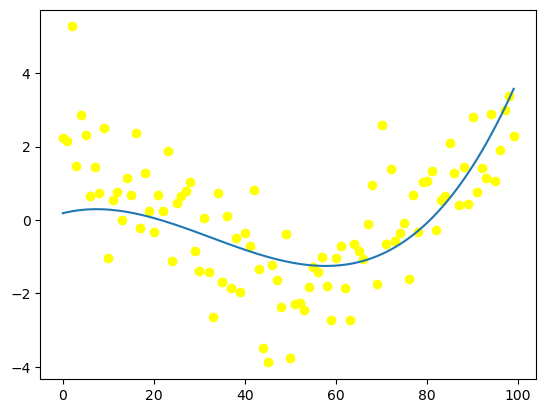

In [100]:

#3) Use a regularized least square with 𝜆 = 100.



reg = 100


D = np.diag(d / (reg+(d**2)))

w_best = VT.T.dot(D).dot(U.T).dot(y)
print('w_best =', w_best)

y_predicted = X.dot(w_best)


plt.scatter(x, y, color='yellow')
plt.plot(x, y_predicted)
plt.show()



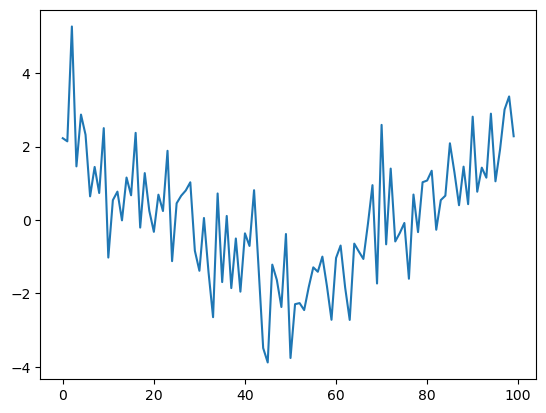

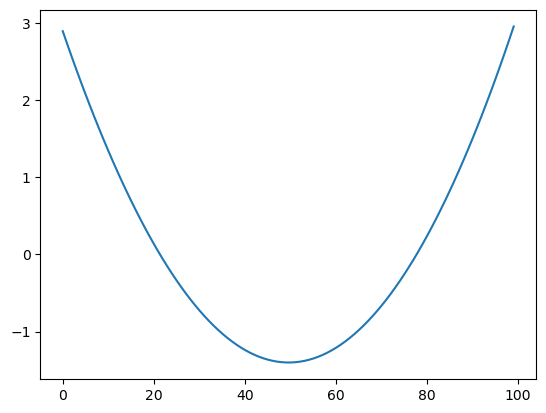

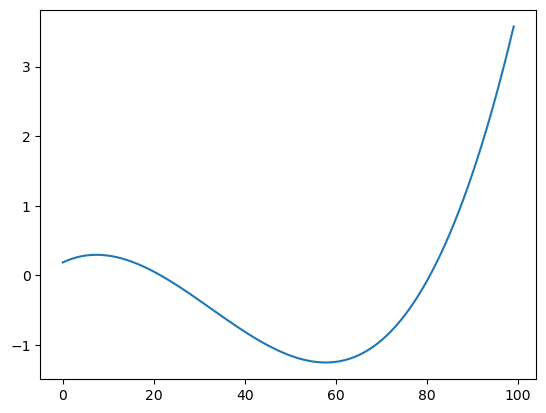

In [103]:
#4) Filter and plot the filtered signal 𝑦[𝑛] using continuous plot ?

plt.plot(x, y)
plt.show()

plt.plot(x, y_predicted1)
plt.show()

plt.plot(x, y_predicted)  #filtered signal 𝑦[𝑛]
plt.show()